In [1]:
import numpy as np
from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(return_X_y=True)
X[:5, :], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [3]:
print(f'X ndim: {X.ndim}, y ndim: {y.ndim}')
print(f'X shape: {X.shape}, y shape: {y.shape}')
print(f'X dtype: {X.dtype}, y dtype {y.dtype}')
print(f'Class label distribution: {np.bincount(y)}')

X ndim: 2, y ndim: 1
X shape: (150, 4), y shape: (150,)
X dtype: float64, y dtype int64
Class label distribution: [50 50 50]


In [4]:
def predicted_class(X_train, y_train, X_new, k, num_classes):
    """
        Make k-NN prediction for a new data point (one data point).
    """
    euclidean_distances = np.sqrt(np.sum((X_train - X_new)**2, axis=1))
    indices_sorted_distances = np.argsort(a=euclidean_distances)
    nearest_neighbours_labels = y_train[indices_sorted_distances[:k]]
    class_counts = np.bincount(nearest_neighbours_labels, minlength=num_classes)
    predicted_class = np.argmax(a=class_counts)
    
    return predicted_class

In [5]:
import random

n_train = int(X.shape[0] * 0.75)    # The number of observations in the training dataset: 112

indices = np.arange(start=0, stop=X.shape[0], step=1)  # Creating an array with the indices from 0 to 150 as array elements.

random.shuffle(x=indices)     # Shuffling the indices (in place)

train_indices = indices[:n_train]   # From 0 --> 112
val_indices = indices[n_train:]     # From 112 --> 150

X_train, y_train = X[train_indices, :], y[train_indices]    # We used train_indices
X_validate, y_validate = X[val_indices, :], y[val_indices]  # We used val_indices

In [6]:
def calculate_accuracy(X_train, y_train, X_validate, y_validate, k, num_classes):
    """
    Calculate accuracy
    """
    n_validate = X_validate.shape[0]

    predictions = []

    for i in range(n_validate):
        y_predicted = predicted_class(X_train, y_train, X_validate[i, :], k=k, num_classes=num_classes)
        predictions.append(y_predicted)

    predictions = np.array(predictions)

    accuracy = np.sum(y_validate == predictions) / y_validate.size 

    return float(accuracy)

In [7]:
acc = calculate_accuracy(X_train, y_train, X_validate, y_validate, k=9, num_classes=4)
print(f'The k-NN model accuracy is about {(acc * 100):.2f}%')

The k-NN model accuracy is about 97.37%


In [ ]:
acc_list = []
for i in range(X_train.shape[0]): 
    acc = calculate_accuracy(X_train, y_train, X_validate, y_validate, k=i, num_classes=4)
    acc_list.append(acc)

accuracy = np.array(acc_list)

(112,)

In [9]:
import matplotlib.pyplot as plt

In [17]:
max_acc = np.max(accuracy)
first_k = np.argmax(accuracy)
max_acc_indices = np.where(accuracy == max_acc)[0]
max_acc_indices
accuracy[max_acc_indices]

k_array = np.arange(X_train.shape[0])
print(f'Highest accuracy: {max_acc:.2f} at k: {first_k}')

Highest accuracy: 1.00 at k: 7


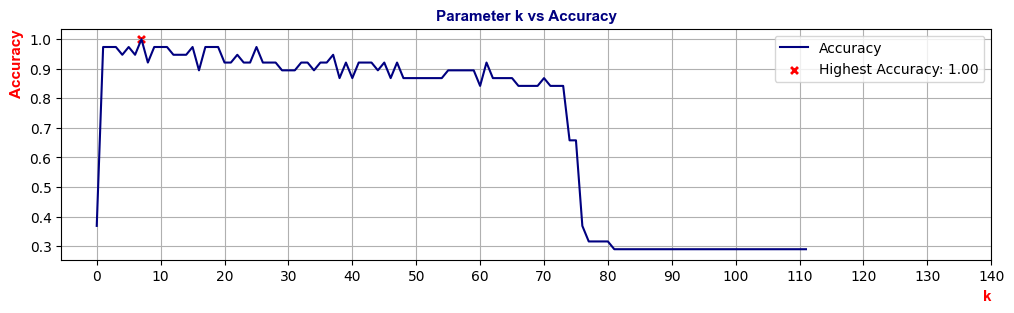

In [18]:
plt.figure(figsize=(12, 3))
plt.plot(k_array, accuracy, color='navy', label='Accuracy')

plt.scatter(k_array[max_acc_indices], accuracy[max_acc_indices], marker='x', color='red', s=25, linewidths=2, label=f'Highest Accuracy: {max_acc:.2f}')

plt.title('Parameter k vs Accuracy', fontdict={'color': 'navy', 'weight': 'bold', 'family': 'arial', 'size': 11})
plt.xlabel('k', loc='right', fontdict={'color': 'red', 'weight': 'bold', 'family': 'arial', 'size': 11})
plt.ylabel('Accuracy', loc='top', fontdict={'color': 'red', 'weight': 'bold', 'family': 'arial', 'size': 11})
plt.xticks(ticks=range(0, X.shape[0], 10))
plt.legend()
plt.grid(visible=True)
plt.show()